# Anthropic workbench evaluations
This lesson will show you how to use Anthropic Workbench to run your own human-graded evaluations.  This is an extremely easy-to-use and visual interface for quickly prototyping prompts and running human-graded evaluations.  While we generally recommend using a more scale-able approach for production evaluations, the Anthropic Workbench is a great place to start with human-graded evaluations before moving to more rigorous code-graded or model-graded evals.

In this lesson we'll see how to use the Workbench to test prompts, run simple evaluations, and compare prompt versions.

---

## The Anthropic workbench

[Anthropic's workbench](https://console.anthropic.com/workbench/) is a great place to quickly prototype prompts and run human-graded evaluations.  This is what the workbench looks like when we first load it: 

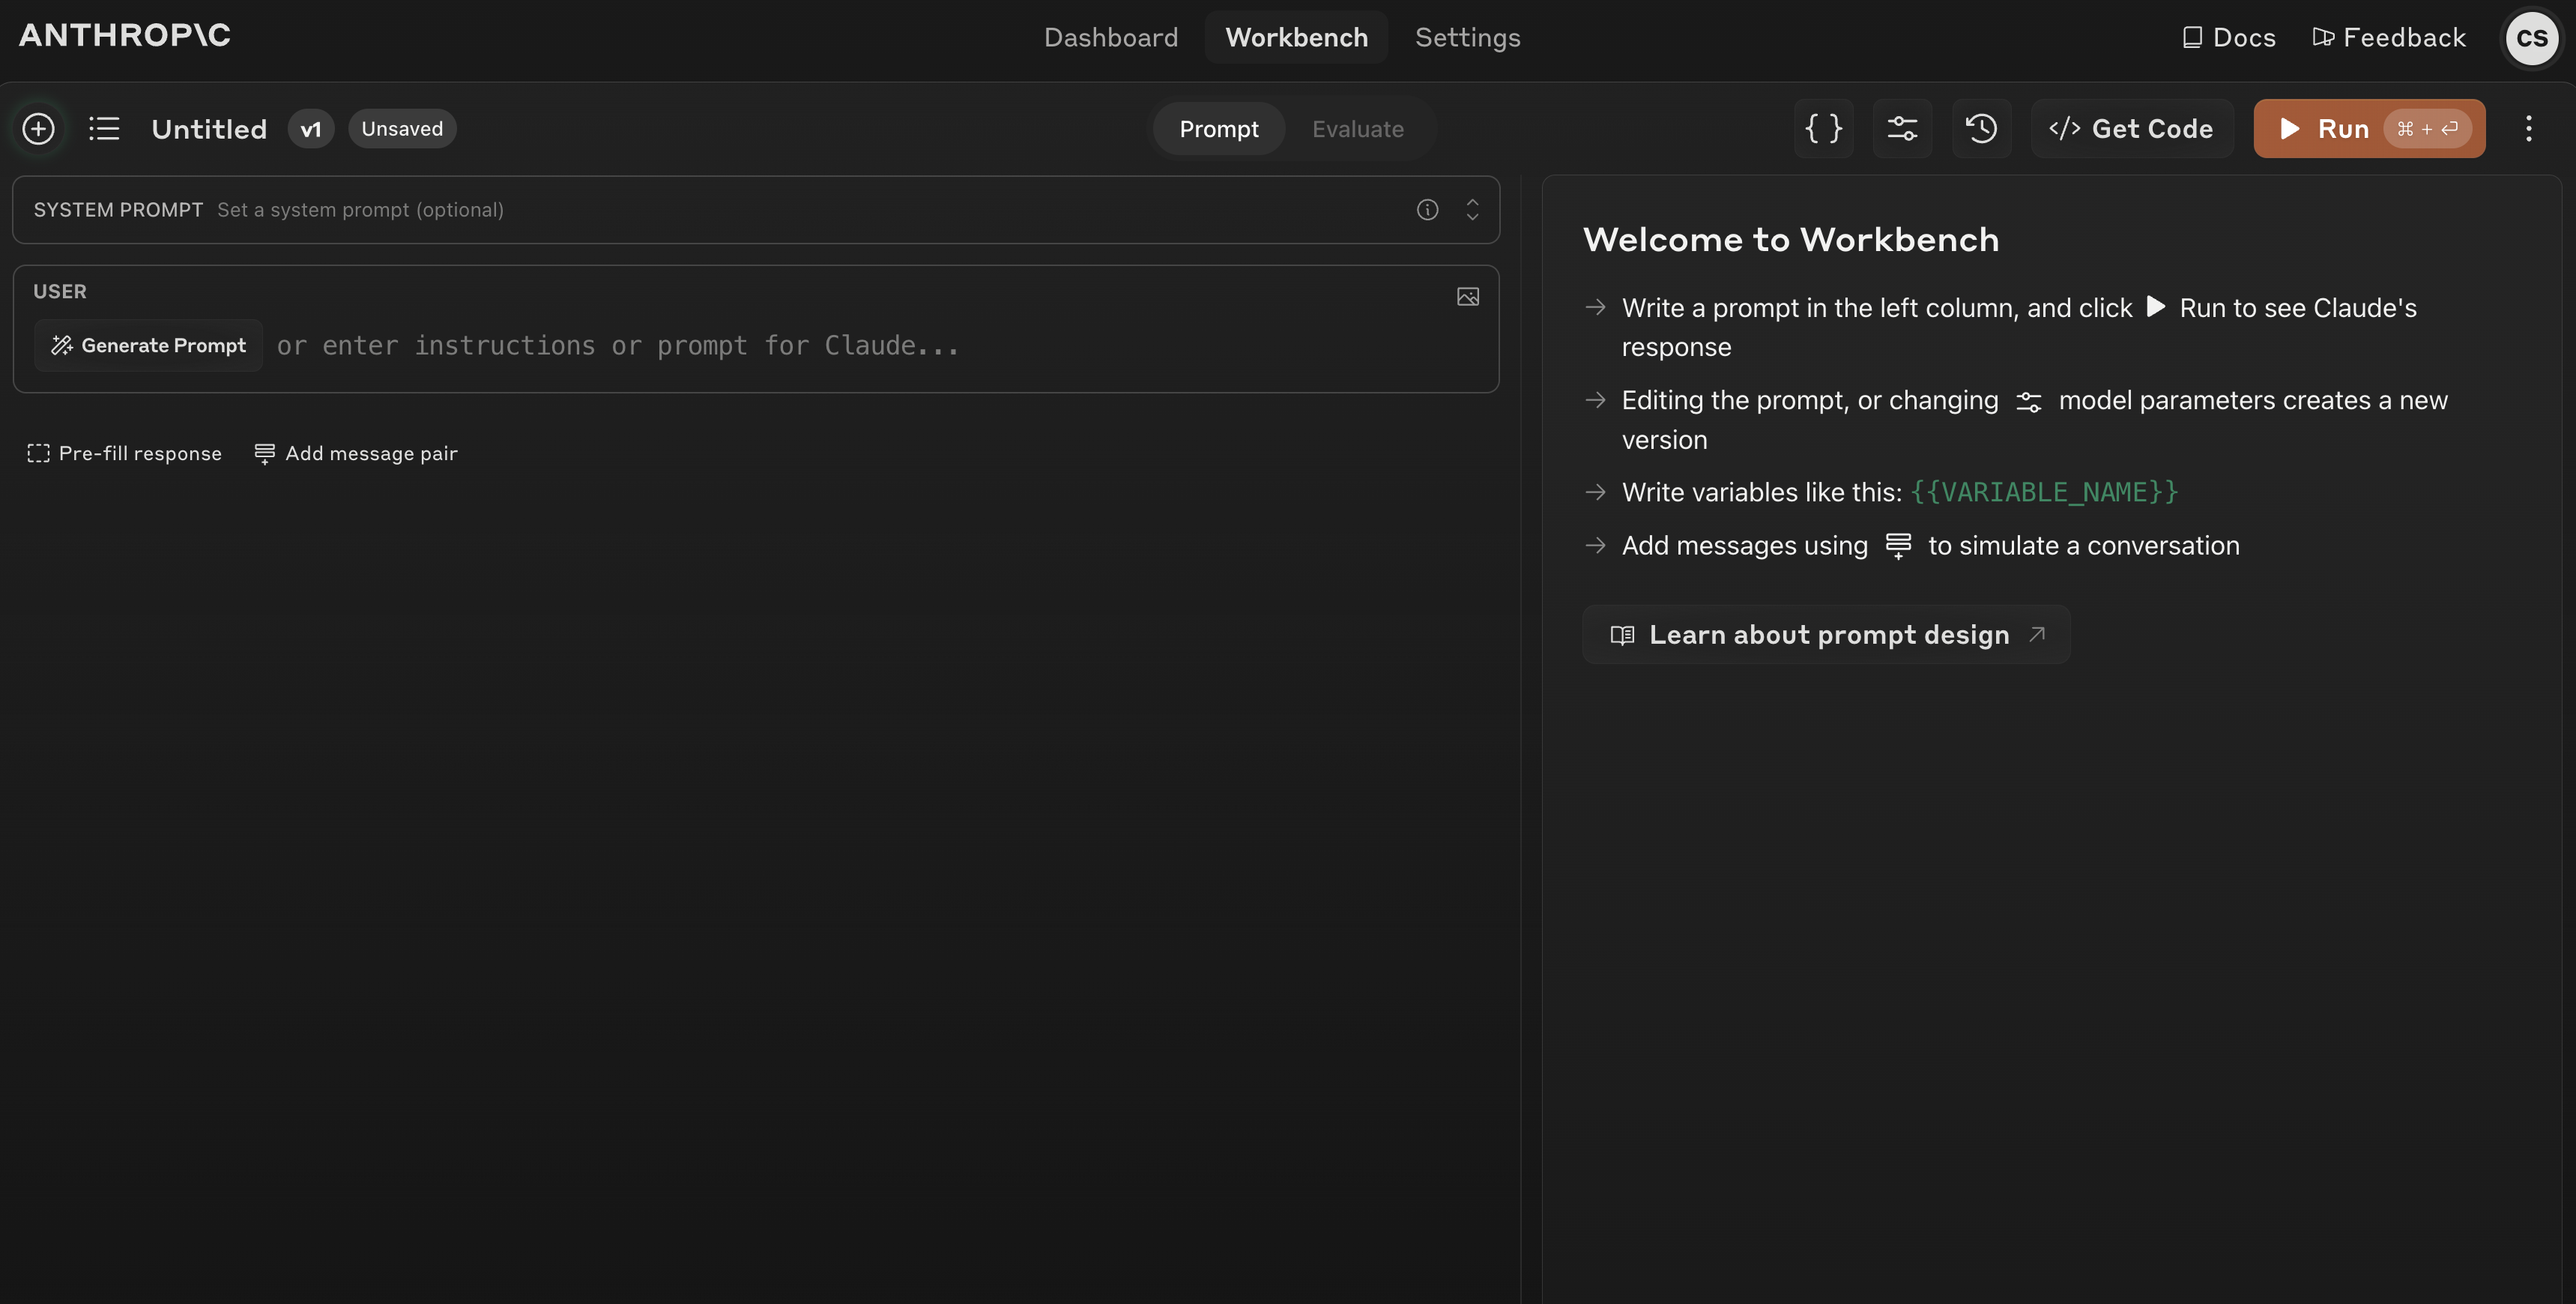

On the left side we can enter a prompt.  Let's imagine we're working on a code-translation application and want to write the best possible prompt to use the Anthropic API to translate code from any coding language into Python.  Here's an initial attempt at a prompt:

```
You are a skilled programmer tasked with translating code from one programming language to Python. Your goal is to produce an accurate and idiomatic Python translation of the provided source code.

Here is the source code to translate:

<source_code>
{{SOURCE_CODE}}
</source_code>

The source code is written in the following language:

<source_language>
{{SOURCE_LANGUAGE}}
</source_language>

Please translate this code to Python
```

Notice the `{{SOURCE_CODE}}` and `{{SOURCE_LANGUAGE}}` variables, which we will later replace with dynamic values.

We can put this prompt into the left side of the workbench: 

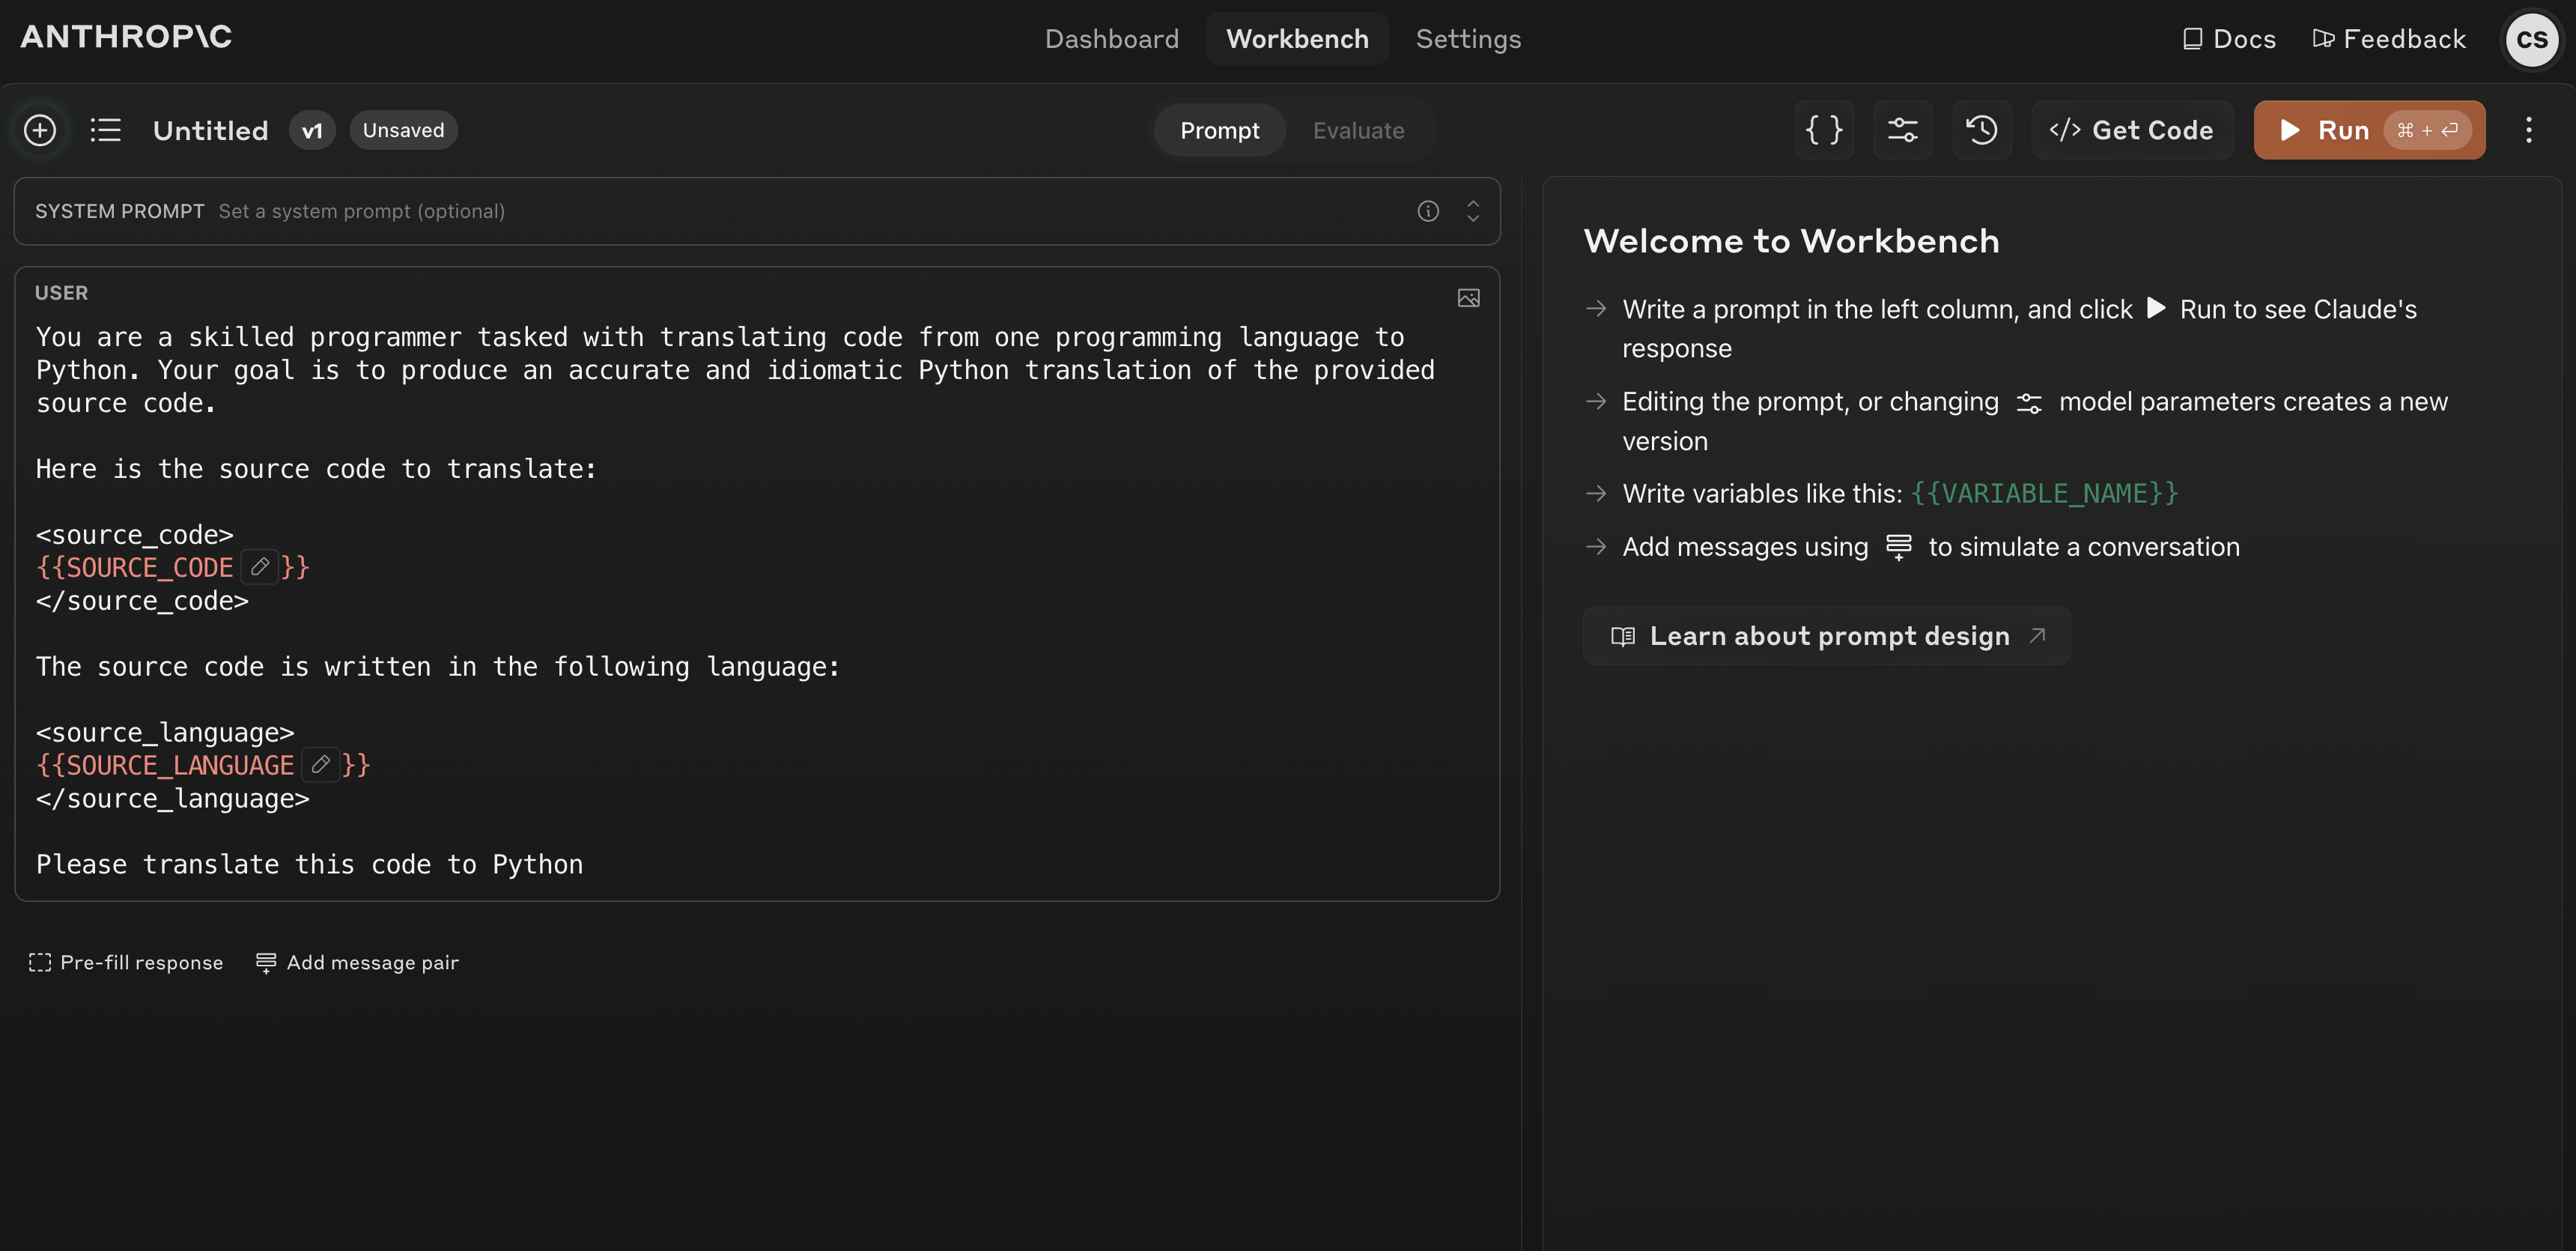

Next, we can set test values for our variables by clicking on the variables (`{ }`) button:

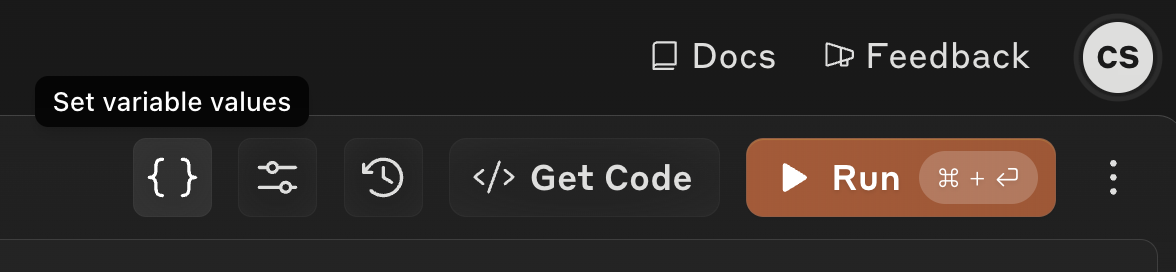

This will open a dialog, asking us to input values for the `{{SOURCE_CODE}}` and `{{SOURCE_LANGUAGE}}` variables:

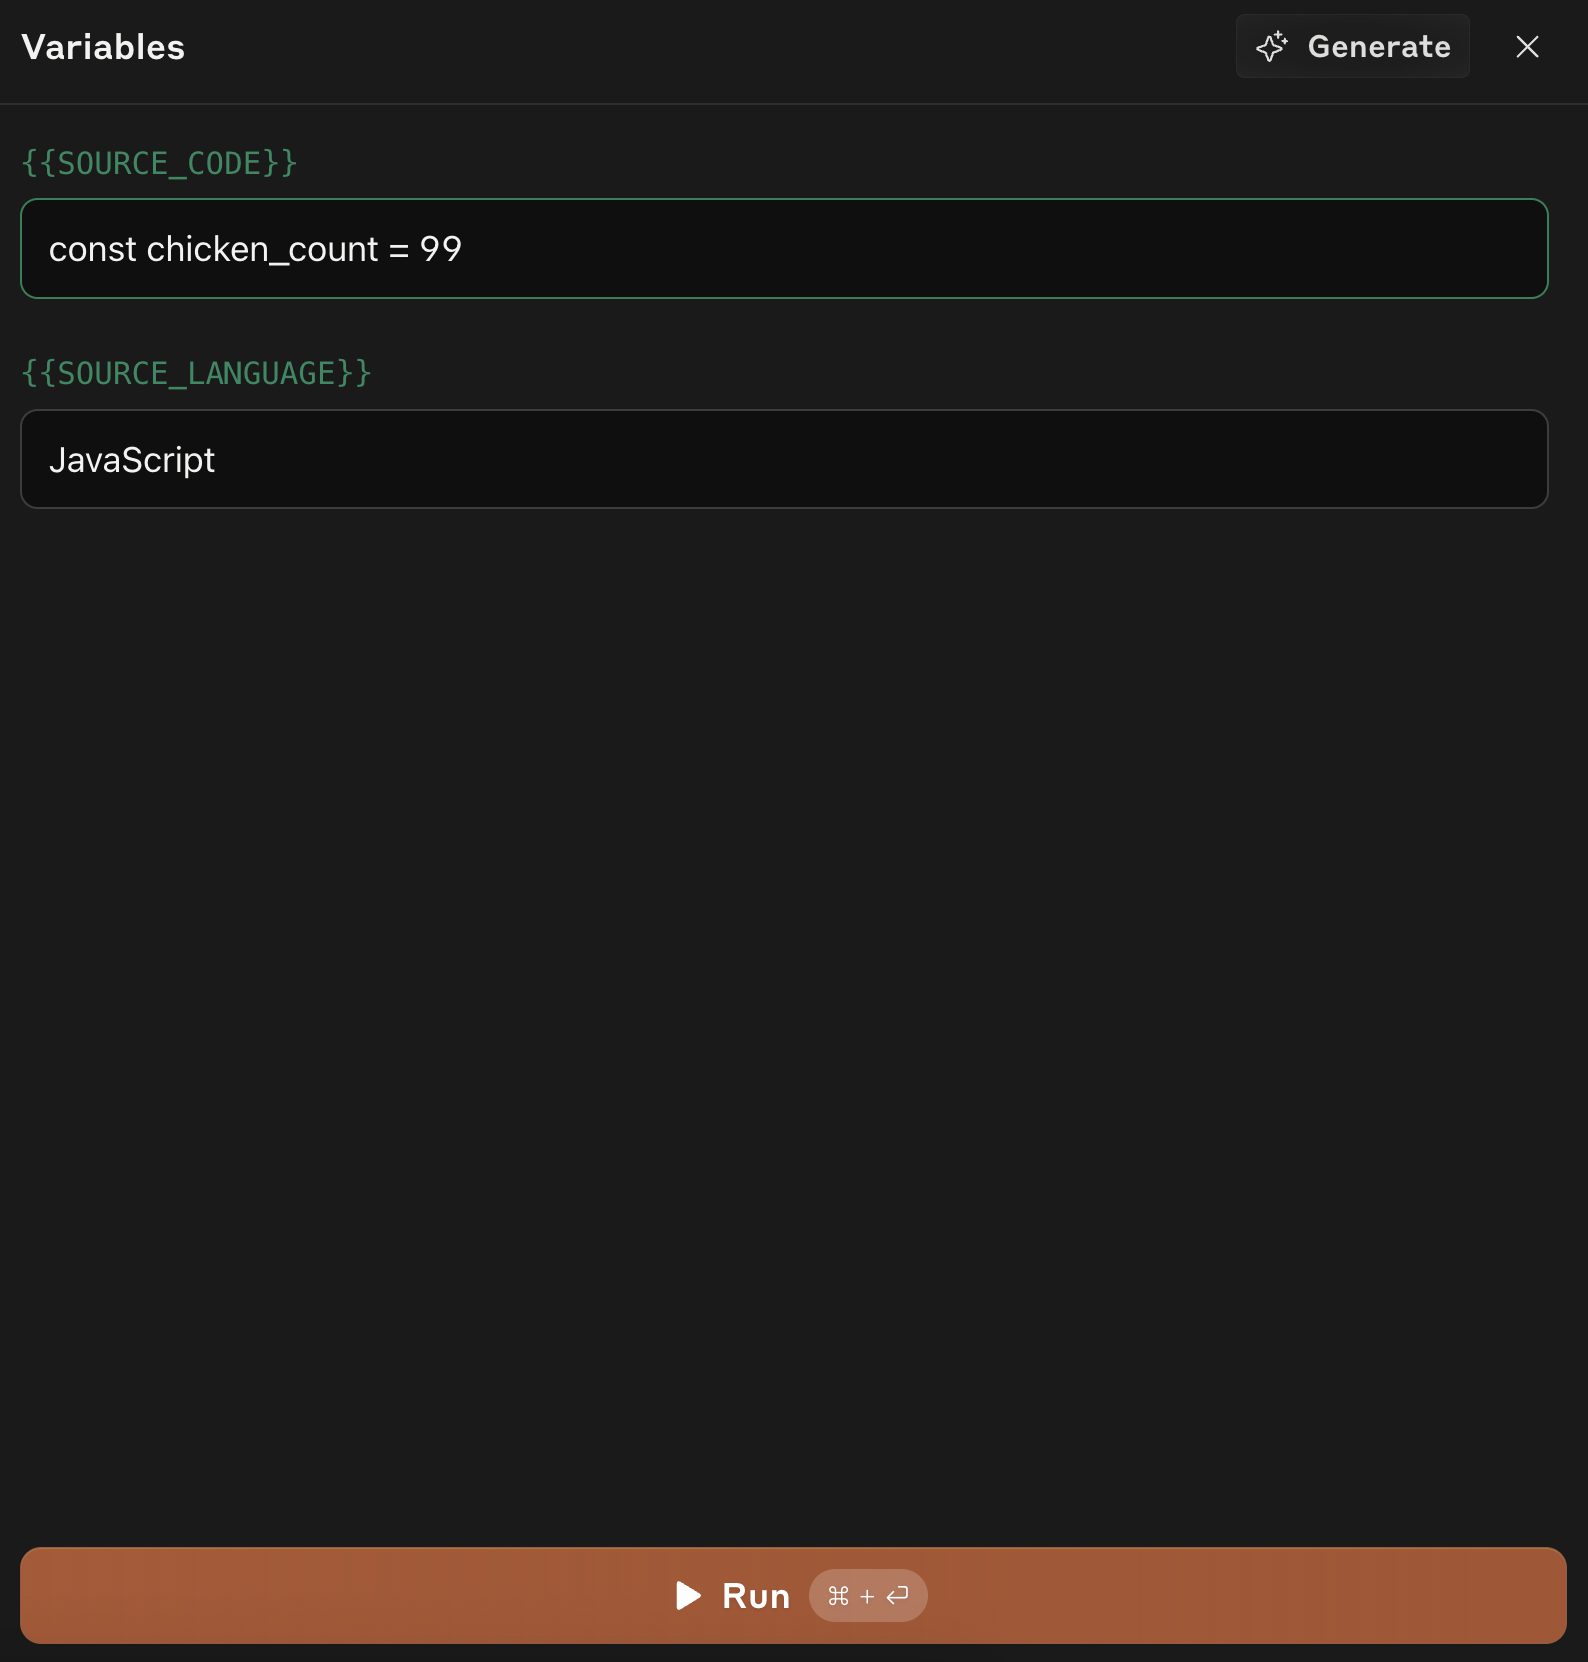


Next, we can hit run and see the resulting output from the model:

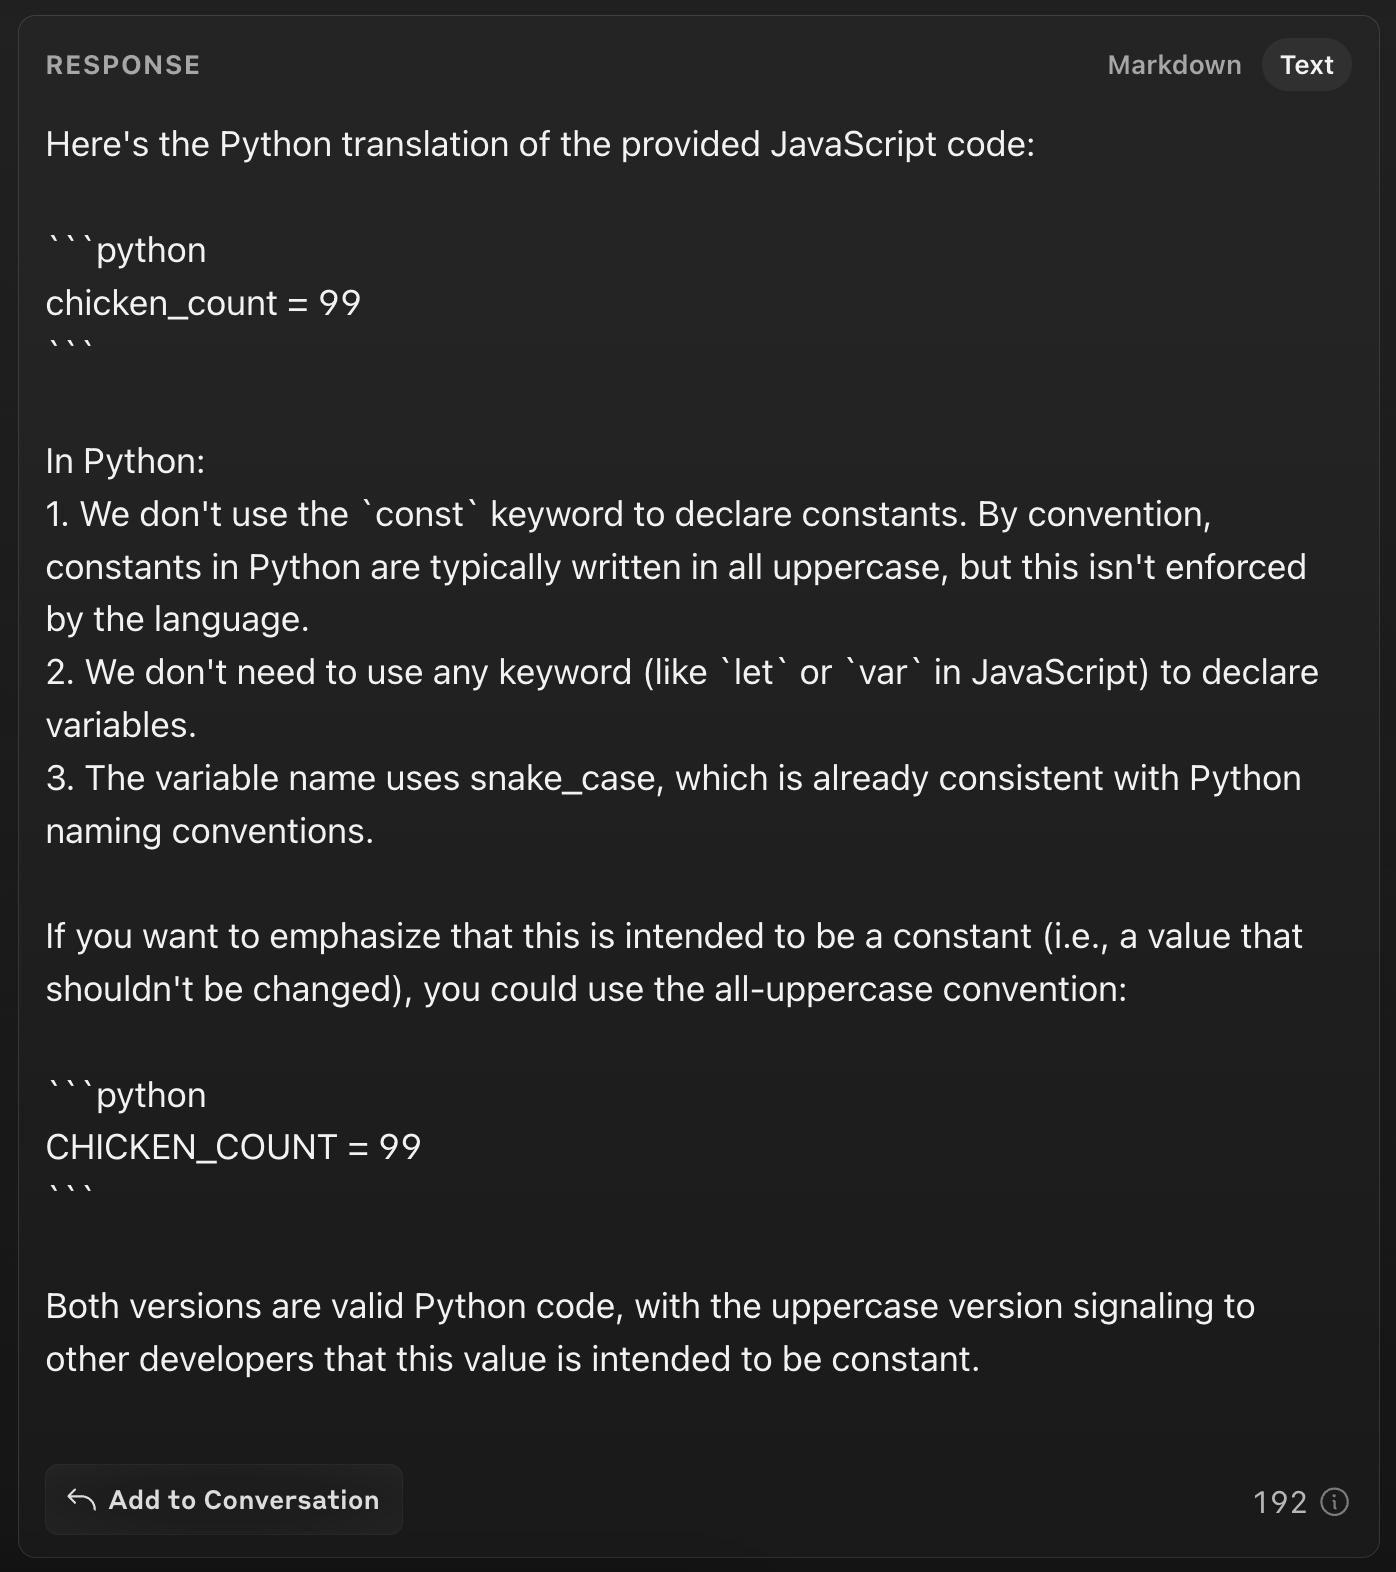

---

## Workbench evaluations

Testing our prompt with one set of variables at a time is a good place to start, but the Workbench also comes with a built-in evaluation tool to help us run prompts against multiple inputs.  To switch over to the evaluate view, click the "Evaluate" toggle button at the top: 

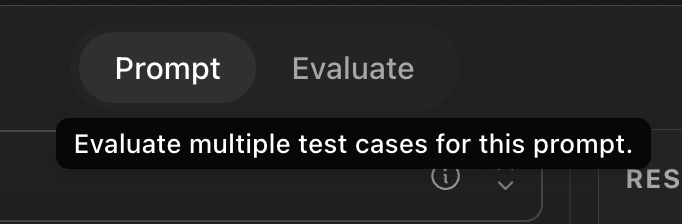

This opens the evaluate view, with our initial result pre-populated:

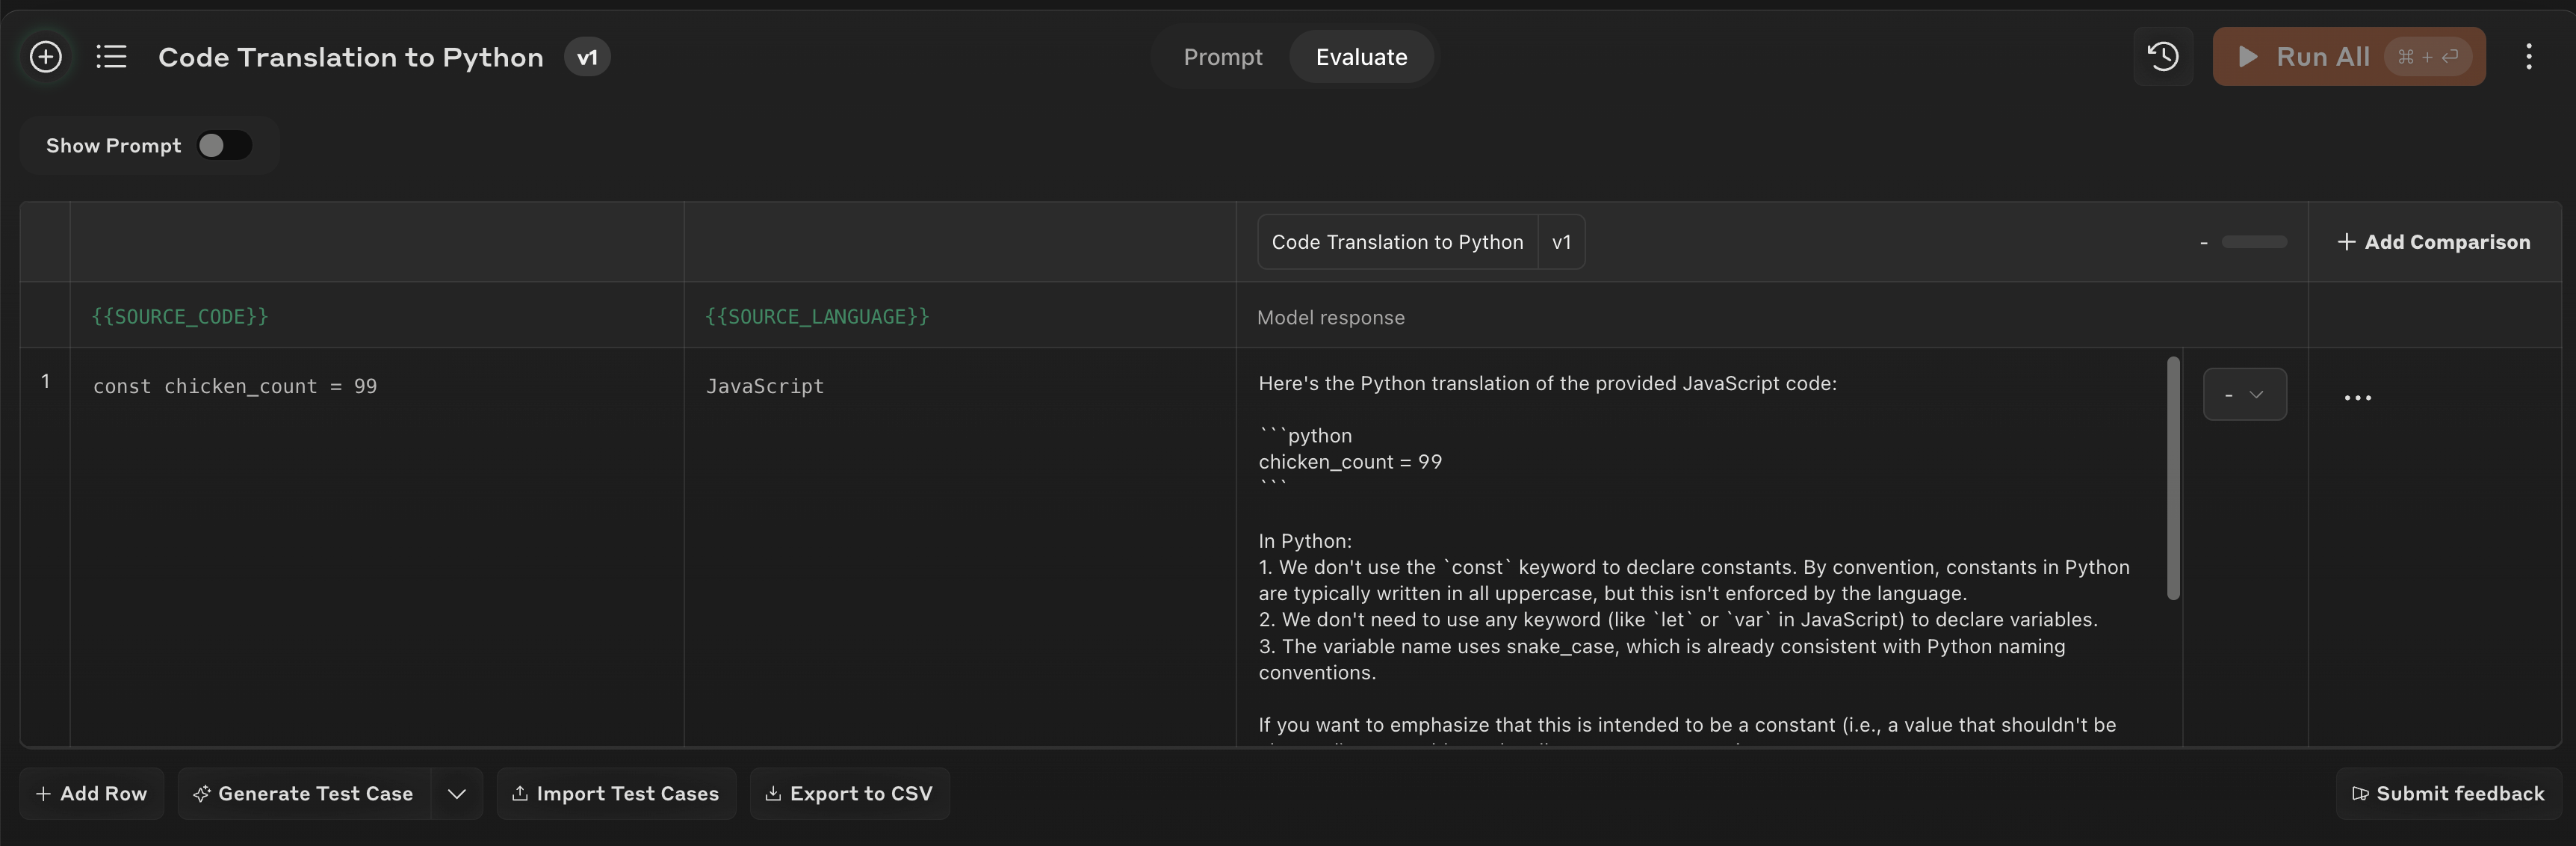

Next, we can click the "Add Row" button to add some new test cases.  Let's add in two new test cases: some Ruby code and some C# code: 

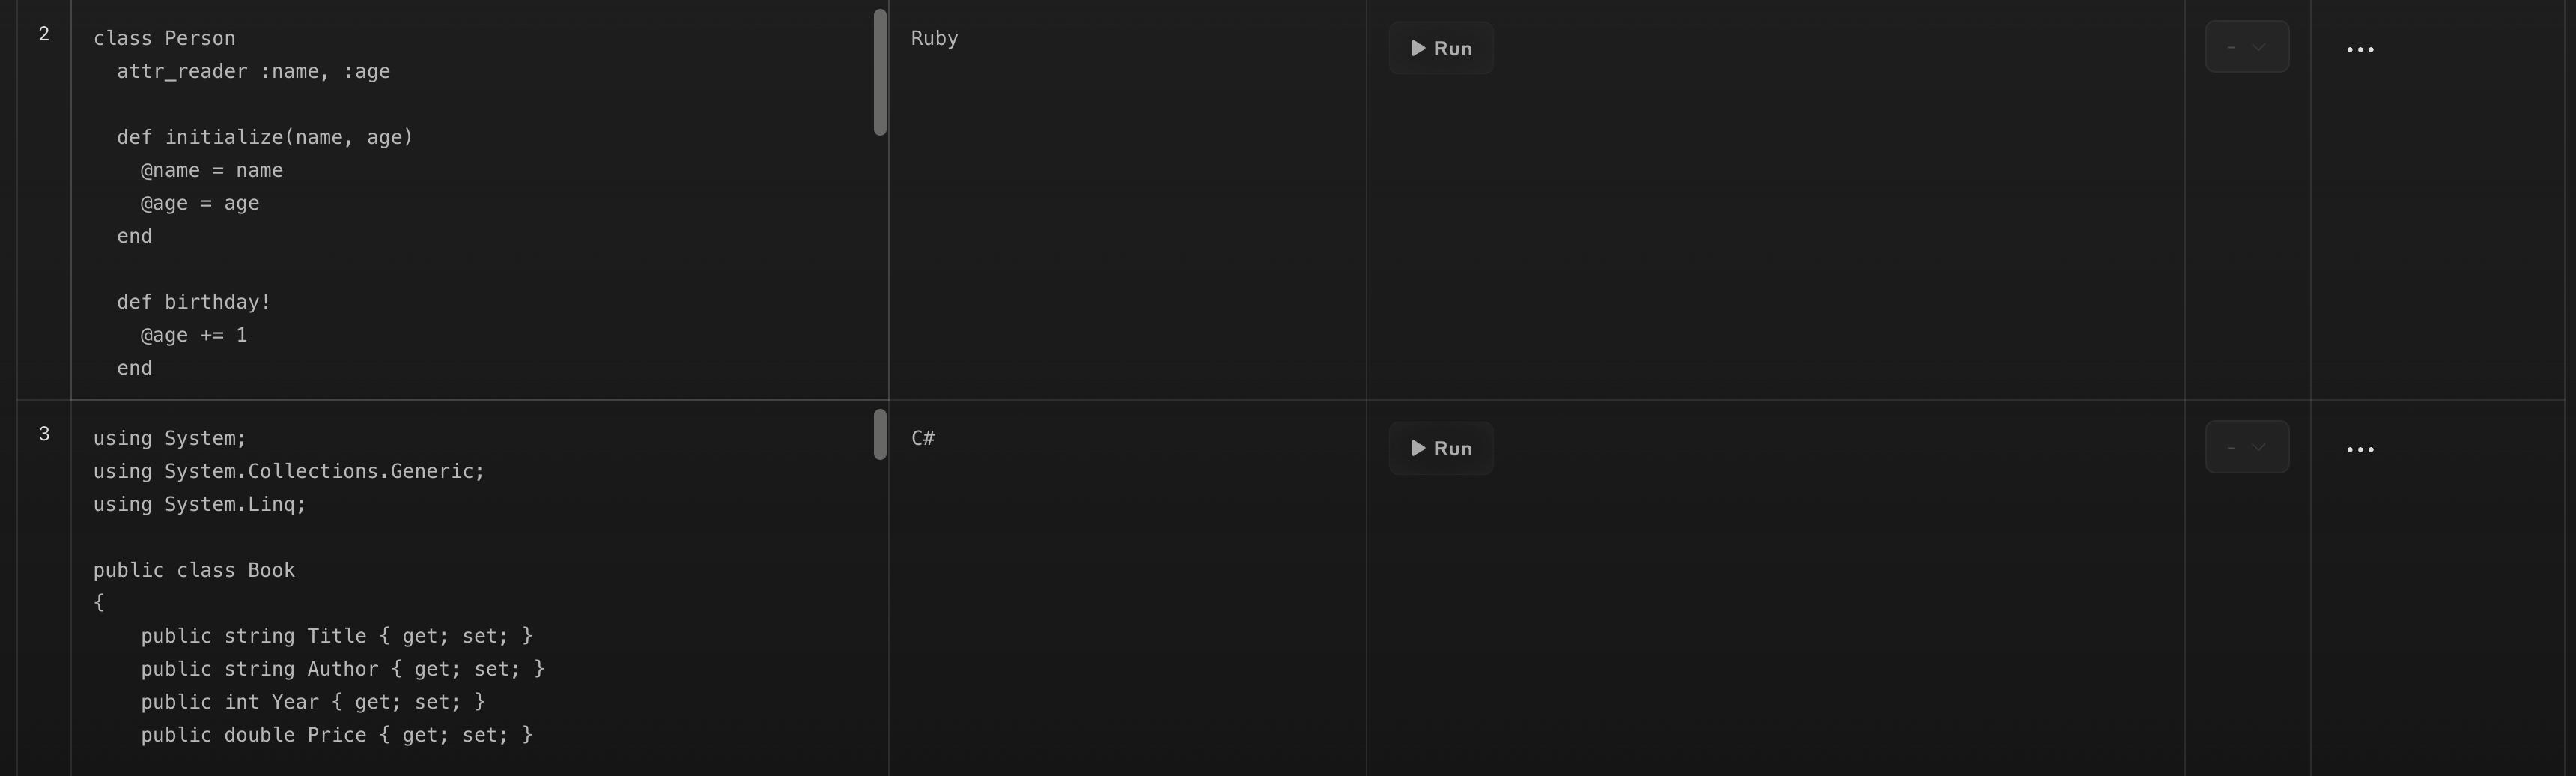


Next, we can either click the individual "Run" buttons next to each test case, or we can click the orange "Run Remaining" button to click all remaining un-run test cases:

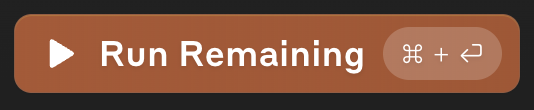

Let's click the Run Remaining button and take a look at our model responses:

This are the results we got:

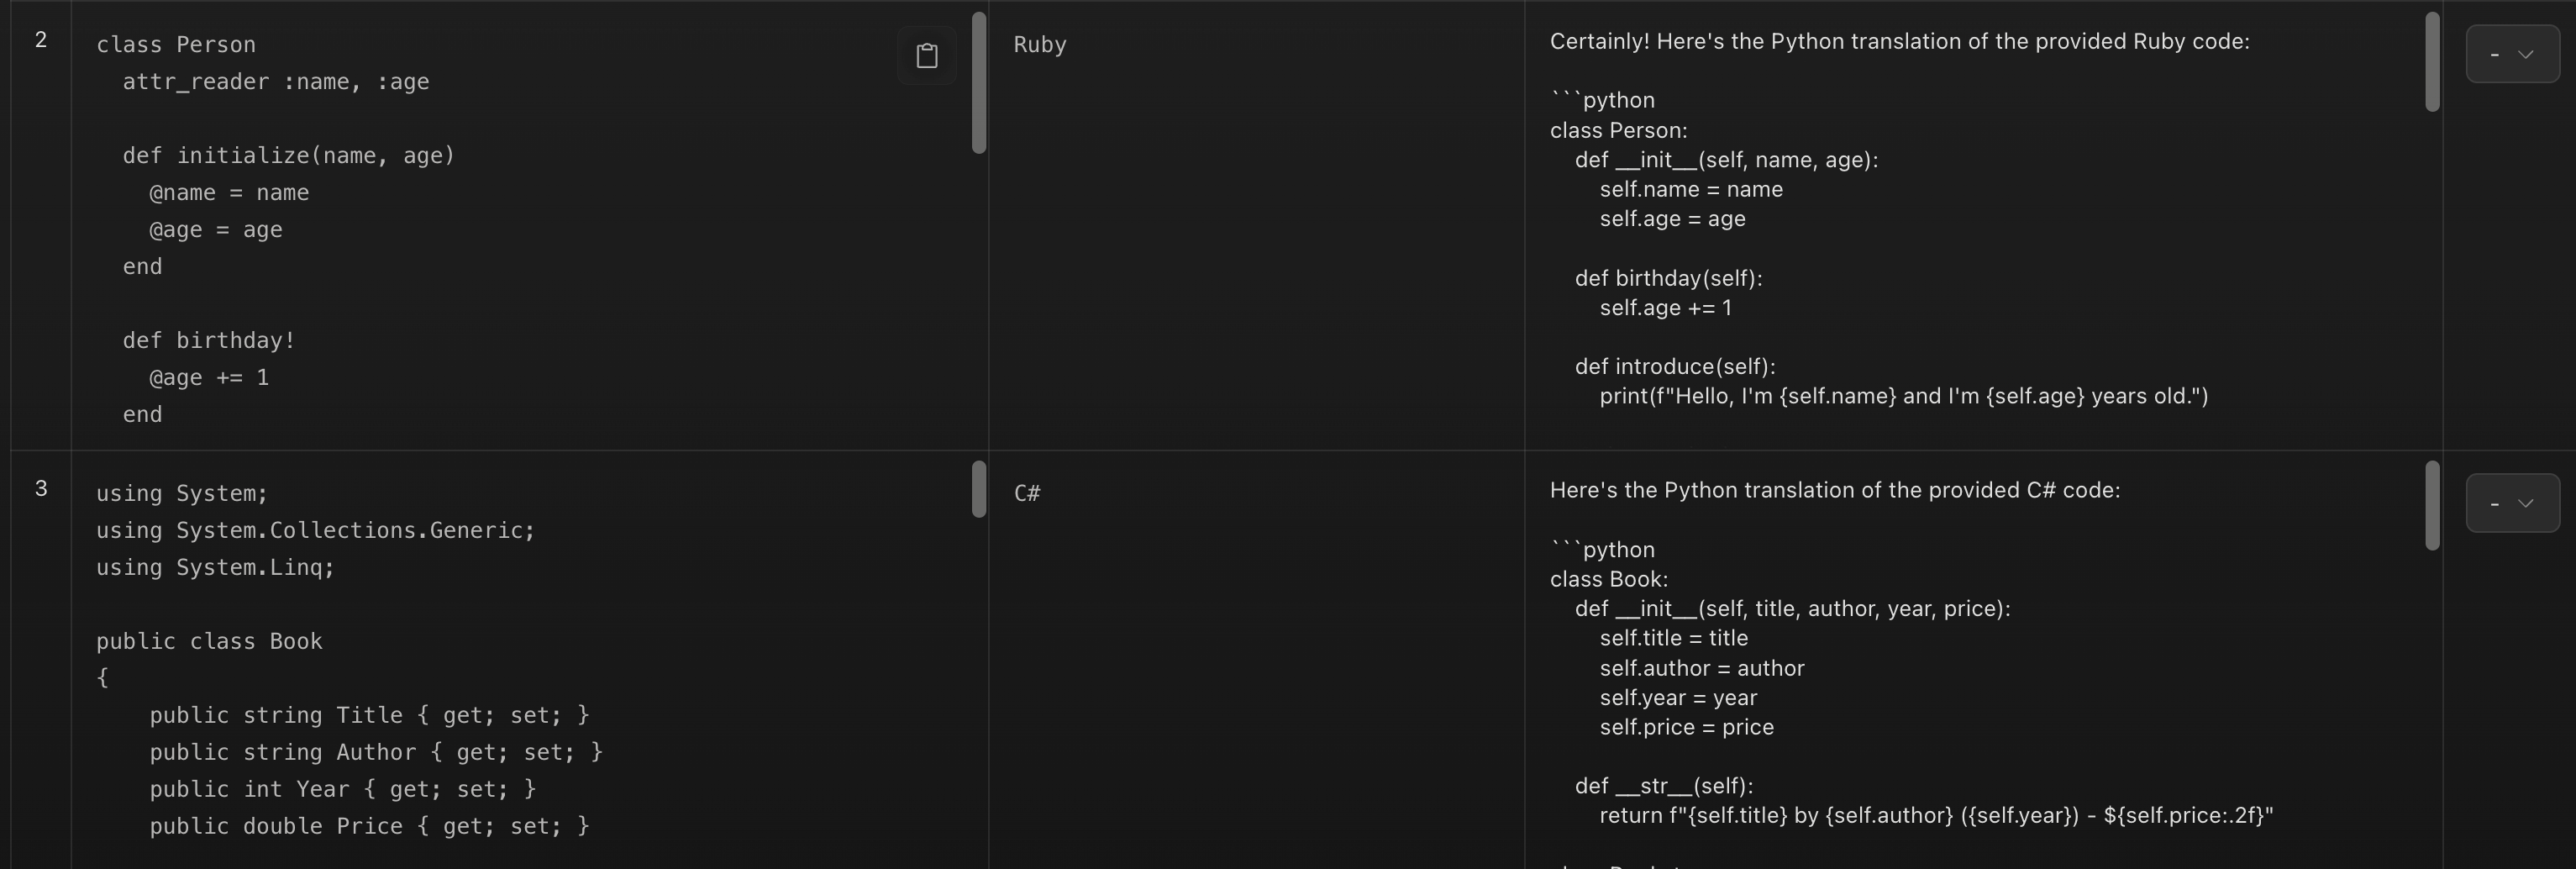

--- 

## Human grading

Now it's time to take a close look at the model outputs and give them scores. In the right column, we have the option of assigning a score to each output: 

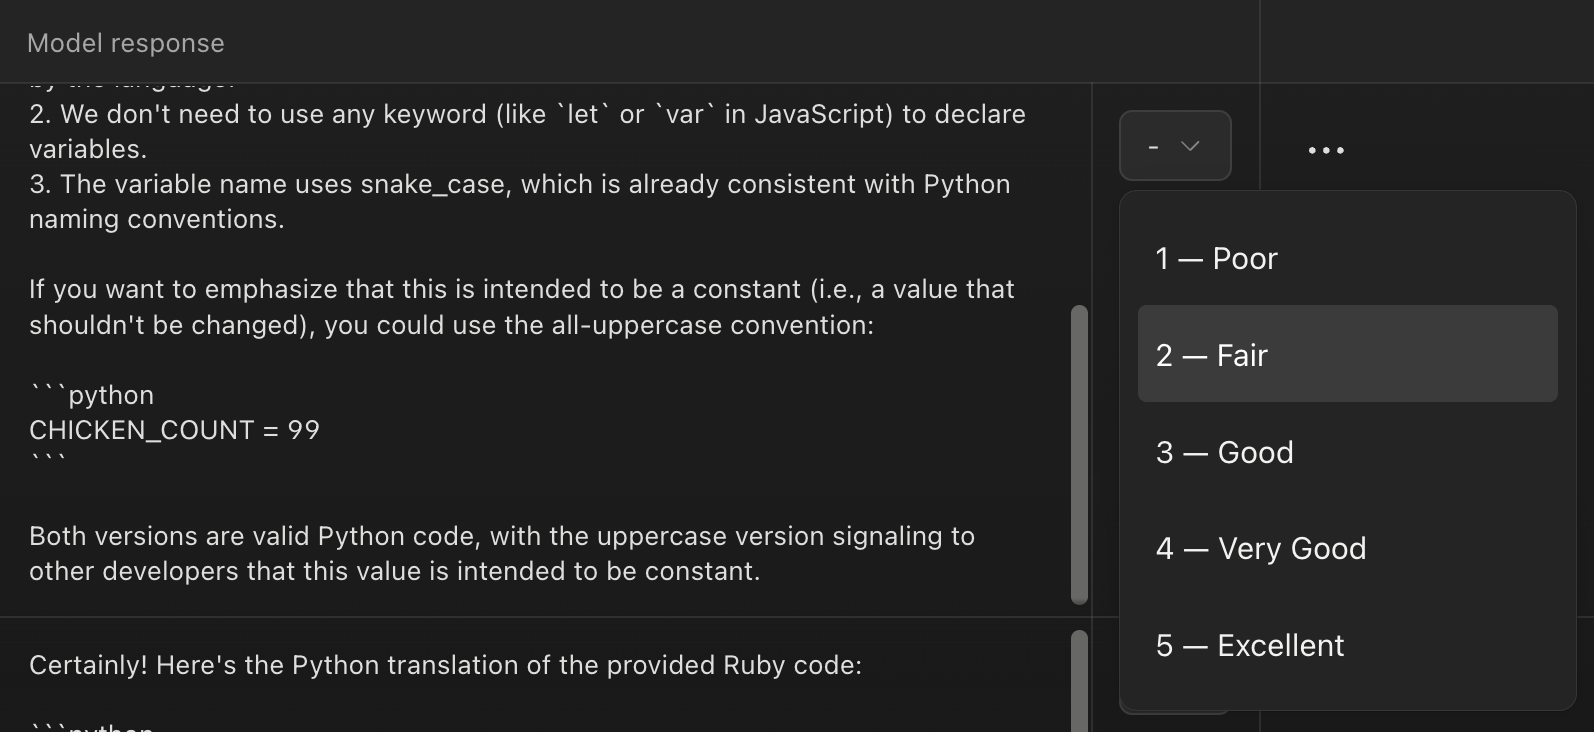


Let's take a closer look at some of the outputs.

### JavaScript test case results

This is the result from our JavaScript translation test case:

```
Here's the Python translation of the provided JavaScript code:

chicken_count = 99


In Python:
1. We don't use the `const` keyword to declare constants. By convention, constants in Python are typically written in all uppercase, but this isn't enforced by the language.
2. We don't need to use any keyword (like `let` or `var` in JavaScript) to declare variables.
3. The variable name uses snake_case, which is already consistent with Python naming conventions.

If you want to emphasize that this is intended to be a constant (i.e., a value that shouldn't be changed), you could use the all-uppercase convention:


CHICKEN_COUNT = 99


Both versions are valid Python code, with the uppercase version signaling to other developers that this value is intended to be constant.
```

### Ruby test case results


This is the result from our Ruby translation test case:

```
Certainly! Here's the Python translation of the provided Ruby code:


class Person:
    def __init__(self, name, age):
        self.name = name
        self.age = age

    def birthday(self):
        self.age += 1

    def introduce(self):
        print(f"Hello, I'm {self.name} and I'm {self.age} years old.")

    @classmethod
    def create_family(cls, members):
        return [cls(name, age) for name, age in members]

# Create a family
family = Person.create_family([
    ["Alice", 35],
    ["Bob", 40],
    ["Charlie", 12]
])

# Introduce family members
for person in family:
    person.introduce()

# Celebrate Charlie's birthday
charlie = next(person for person in family if person.name == "Charlie")
charlie.birthday()
charlie.introduce()


Here are the key changes and explanations:

1. In Python, we don't need to explicitly declare attribute readers. The attributes are accessible by default.

2. The `initialize` method in Ruby becomes `__init__` in Python.

3. The `birthday!` method is renamed to `birthday` in Python, as the exclamation mark is not typically used in Python method names.

4. The `self.` prefix is used explicitly in Python method definitions and when accessing instance attributes.

5. String interpolation uses f-strings in Python (e.g., `f"Hello, I'm {self.name}"`).

6. The `create_family` class method is defined using the `@classmethod` decorator in Python.

7. List comprehension is used instead of `map` for creating the family members.

8. The `each` method with `&:introduce` is replaced by a simple `for` loop in Python.

9. The `find` method is replaced with `next()` and a generator expression to find Charlie.

This Python code maintains the functionality of the original Ruby code while adhering to Python's syntax and conventions.
```

### Scoring the prompts

All of our current outputs are doing a decent job of translating the code, however there are some key problems:

* We don't need the annoying preambles like "Certainly! Here's the Python translation of the provided Ruby code." There are just a waste of output tokens! 
* The current format is really difficult to parse programmatically.  How would we write code to separately extract the translated Python code?
* We don't need the long explanations at the end of the output.  For our use case, we just want the translated code.

Let's go ahead and grade the outputs.  We'll assign each of them a value of 3 out of 5.

--- 

## Updating the prompt

The next step is to make some changes to our prompt and run the evaluation again! Let's update our prompt to reflect the problems we previously identified.

```
You are a skilled programmer tasked with translating code from one programming language to Python. Your goal is to produce an accurate and idiomatic Python translation of the provided source code.

Here is the source code to translate:

<source_code>
{{SOURCE_CODE}}
</source_code>

The source code is written in the following language:

<source_language>
{{SOURCE_LANGUAGE}}
</source_language>

Please translate this code to Python.
Format your response as follows:

<python_code>
Your Python translation here
</python_code>

Only output the <python_code> tags without any other text content
```


If we switch back to the "Prompt" view, we can update the prompt in the interface:

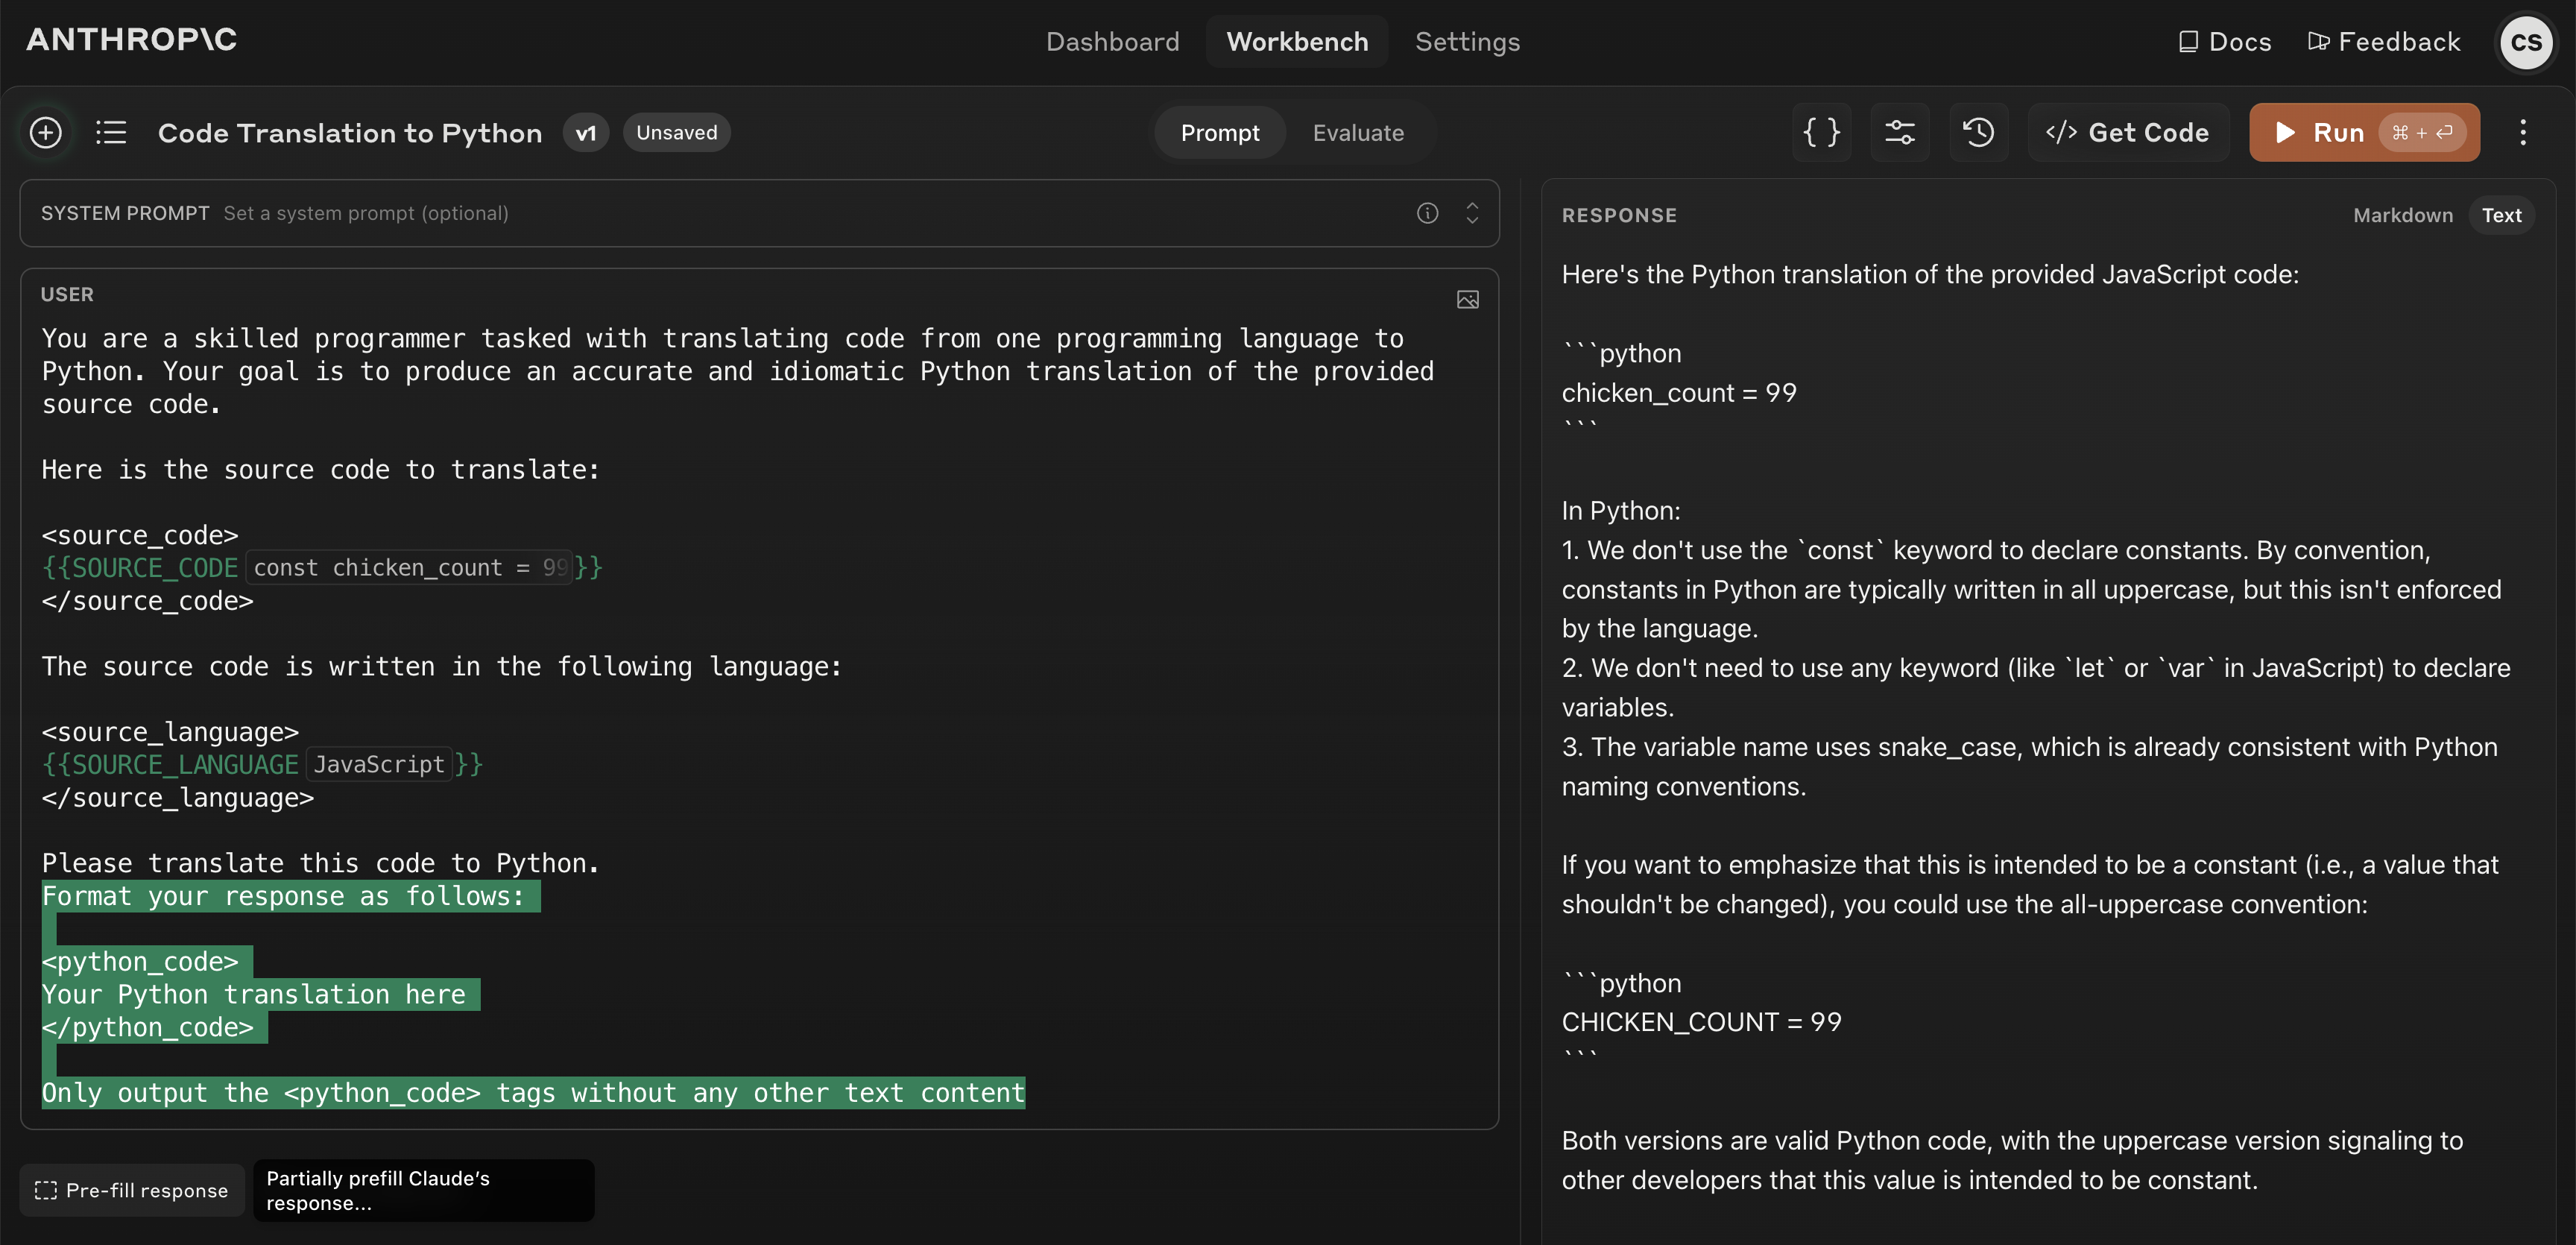

The green highlighted text showcases the addition we made to the prompt

Next, we click the orange "Run" button to test our new prompt.  This is the new result:

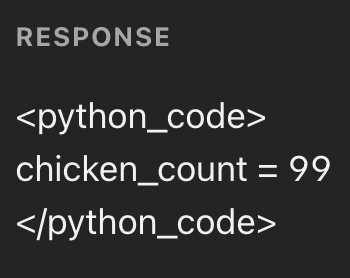

This is exactly what we were hoping for! The response doesn't include a preamble or extended code explanation.

---

## Re-running the evaluation
Next, we can switch back to the evaluation view:

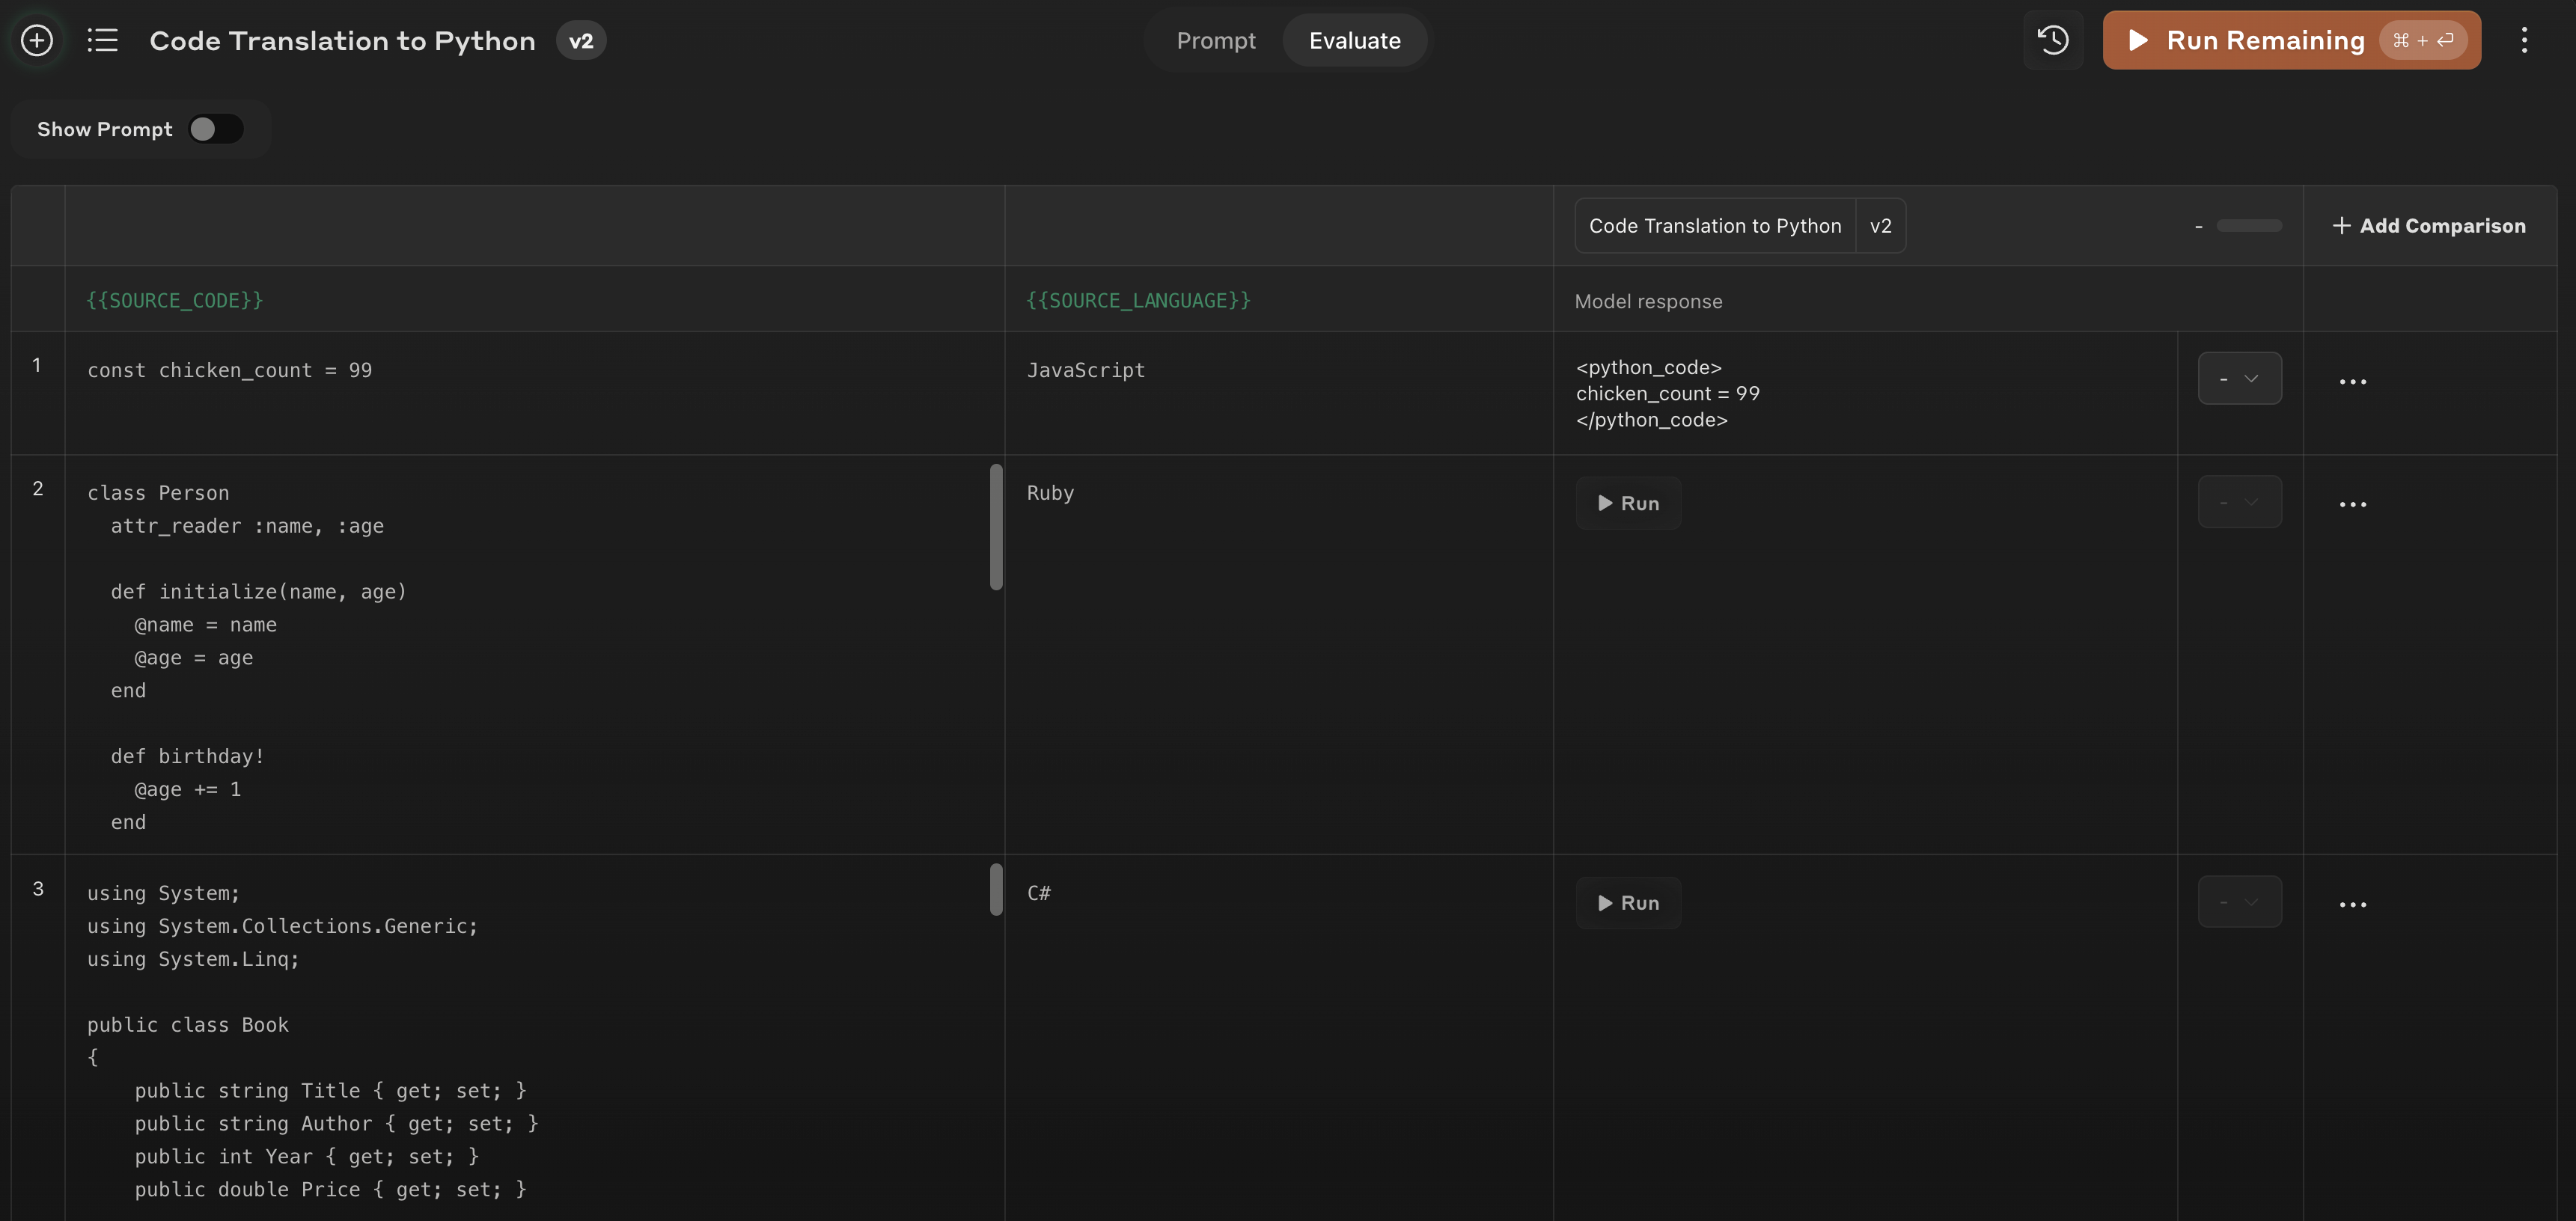

Notice in the top left we see "v2" indicating that this is our second version of the prompt.  Let's click "Run Remaining" and take a look at the outputs for the other test cases:

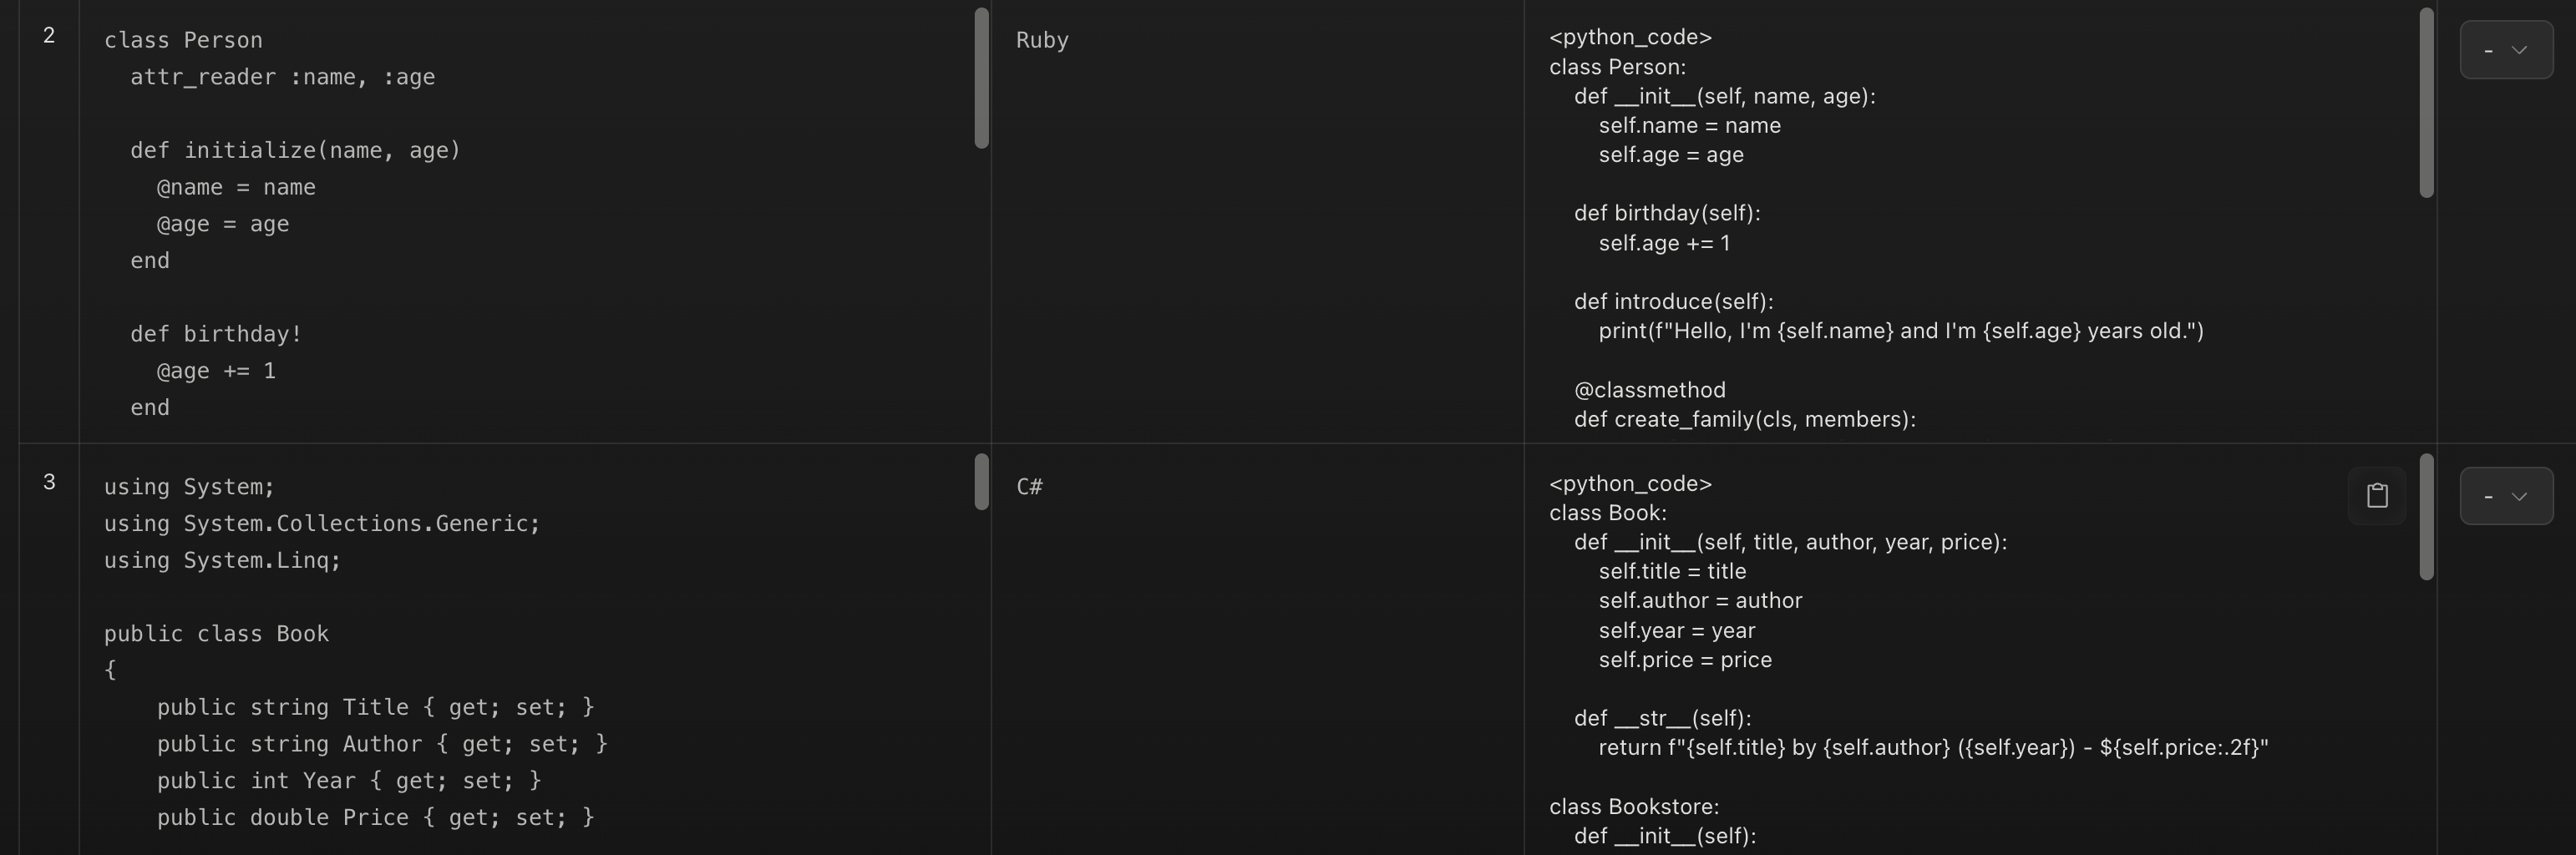



The new outputs look great! They all skip any preamble and explanatory text and only include `<python_code>` tags that contain the translated Python code.  Let's go ahead and mark these as all scoring 5/5!

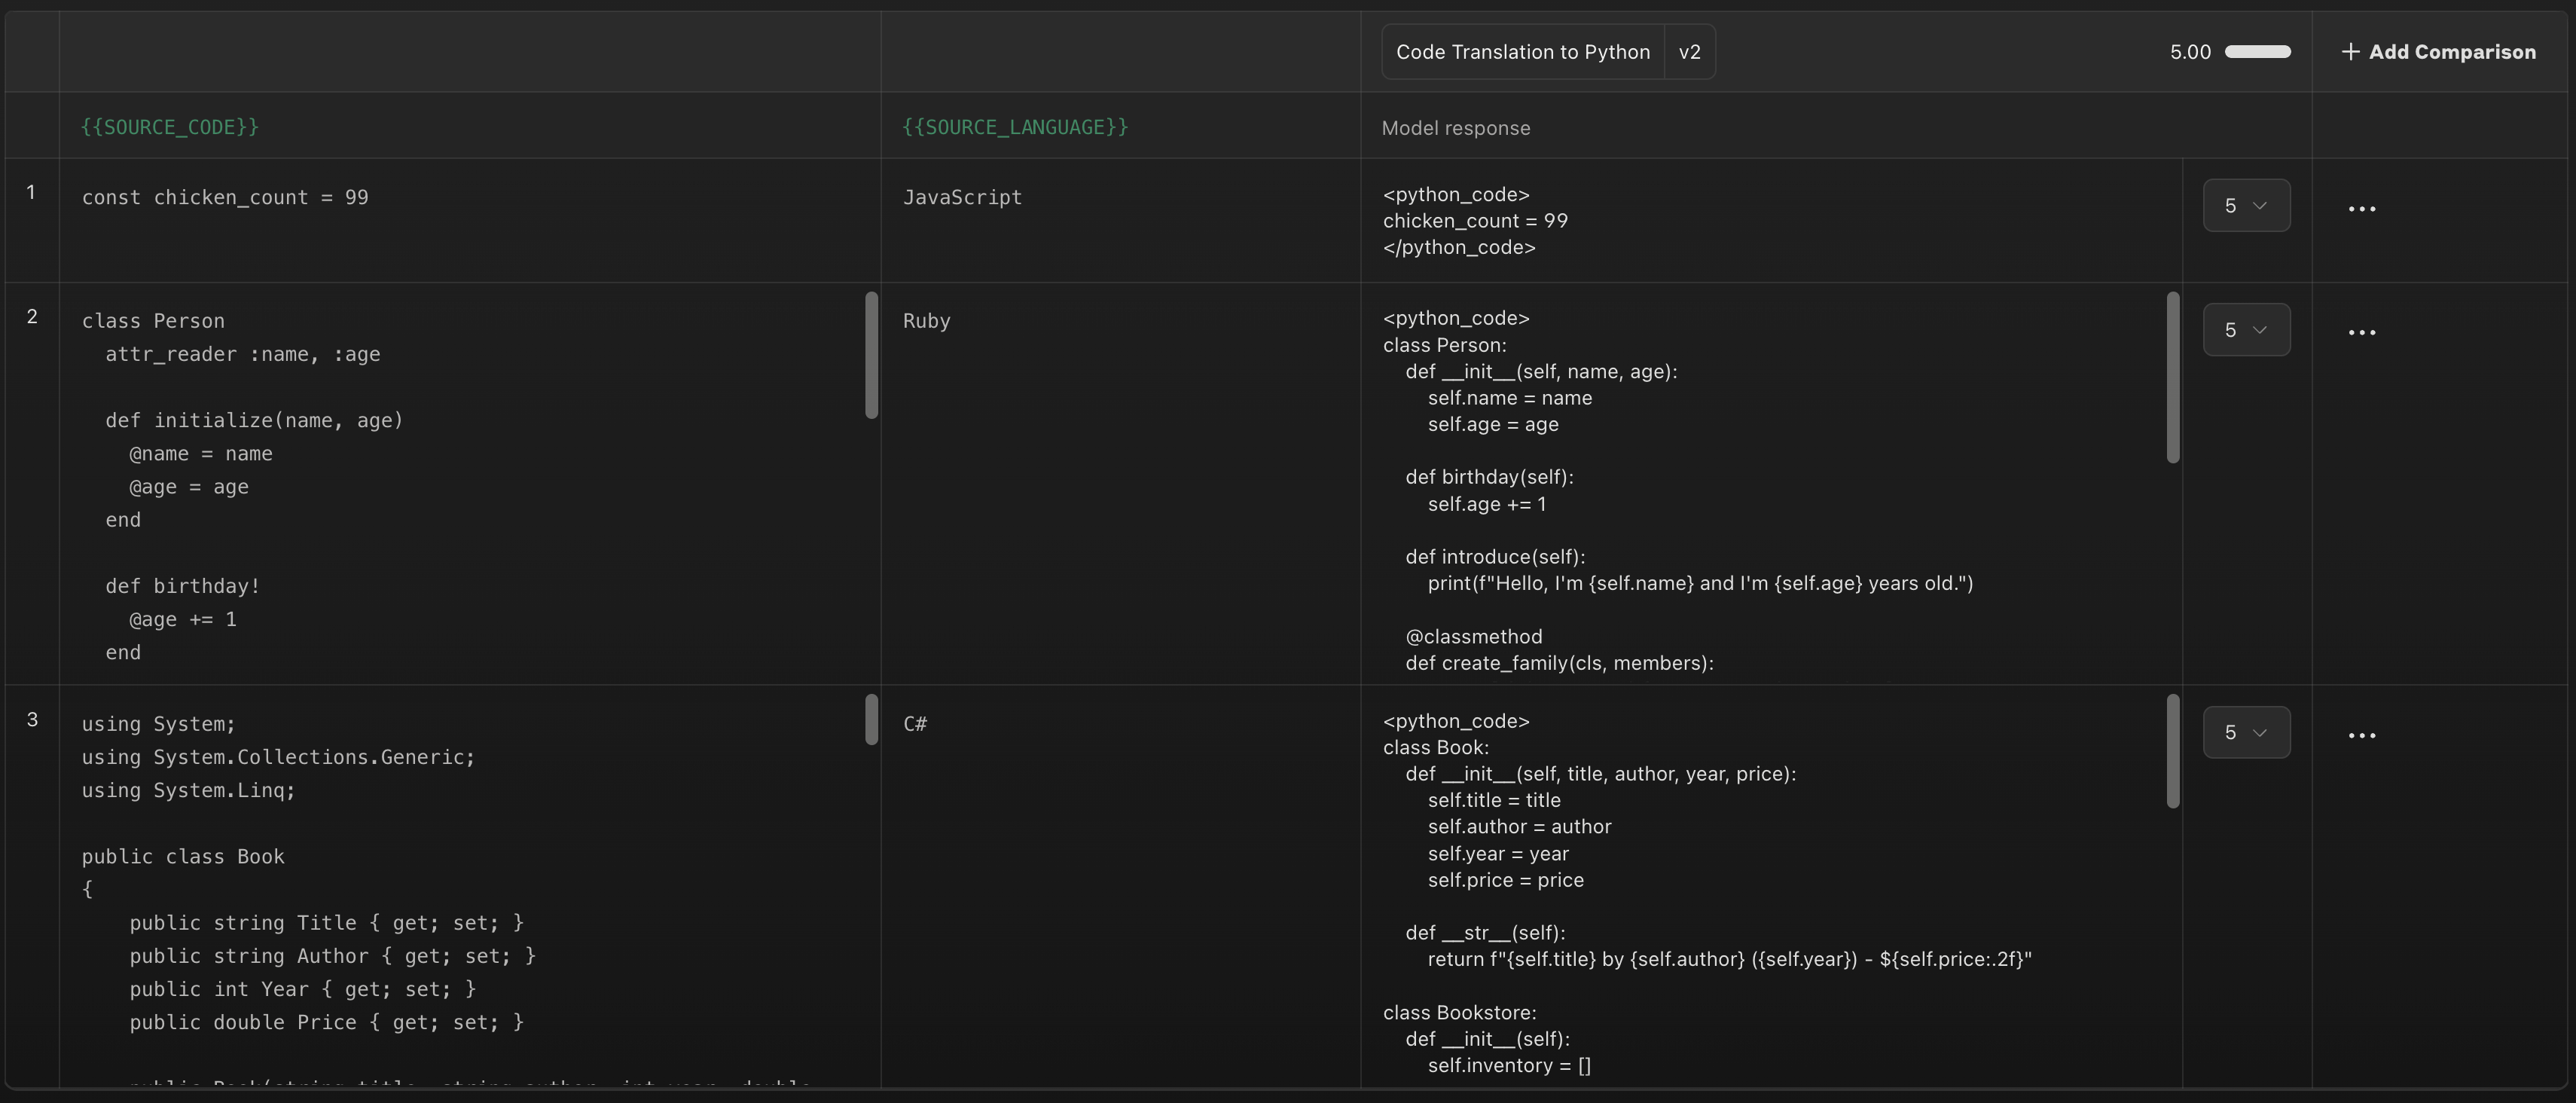

---

## Comparing results

Now that we've tried two different prompts, we can compare the results side by side. We can click on the "+ Add Comparison" button on the top right and select a previous version of our prompt (v1) to compare our v2 results with.  This will showcase the model outputs and human-graded scores for both prompts side by side:

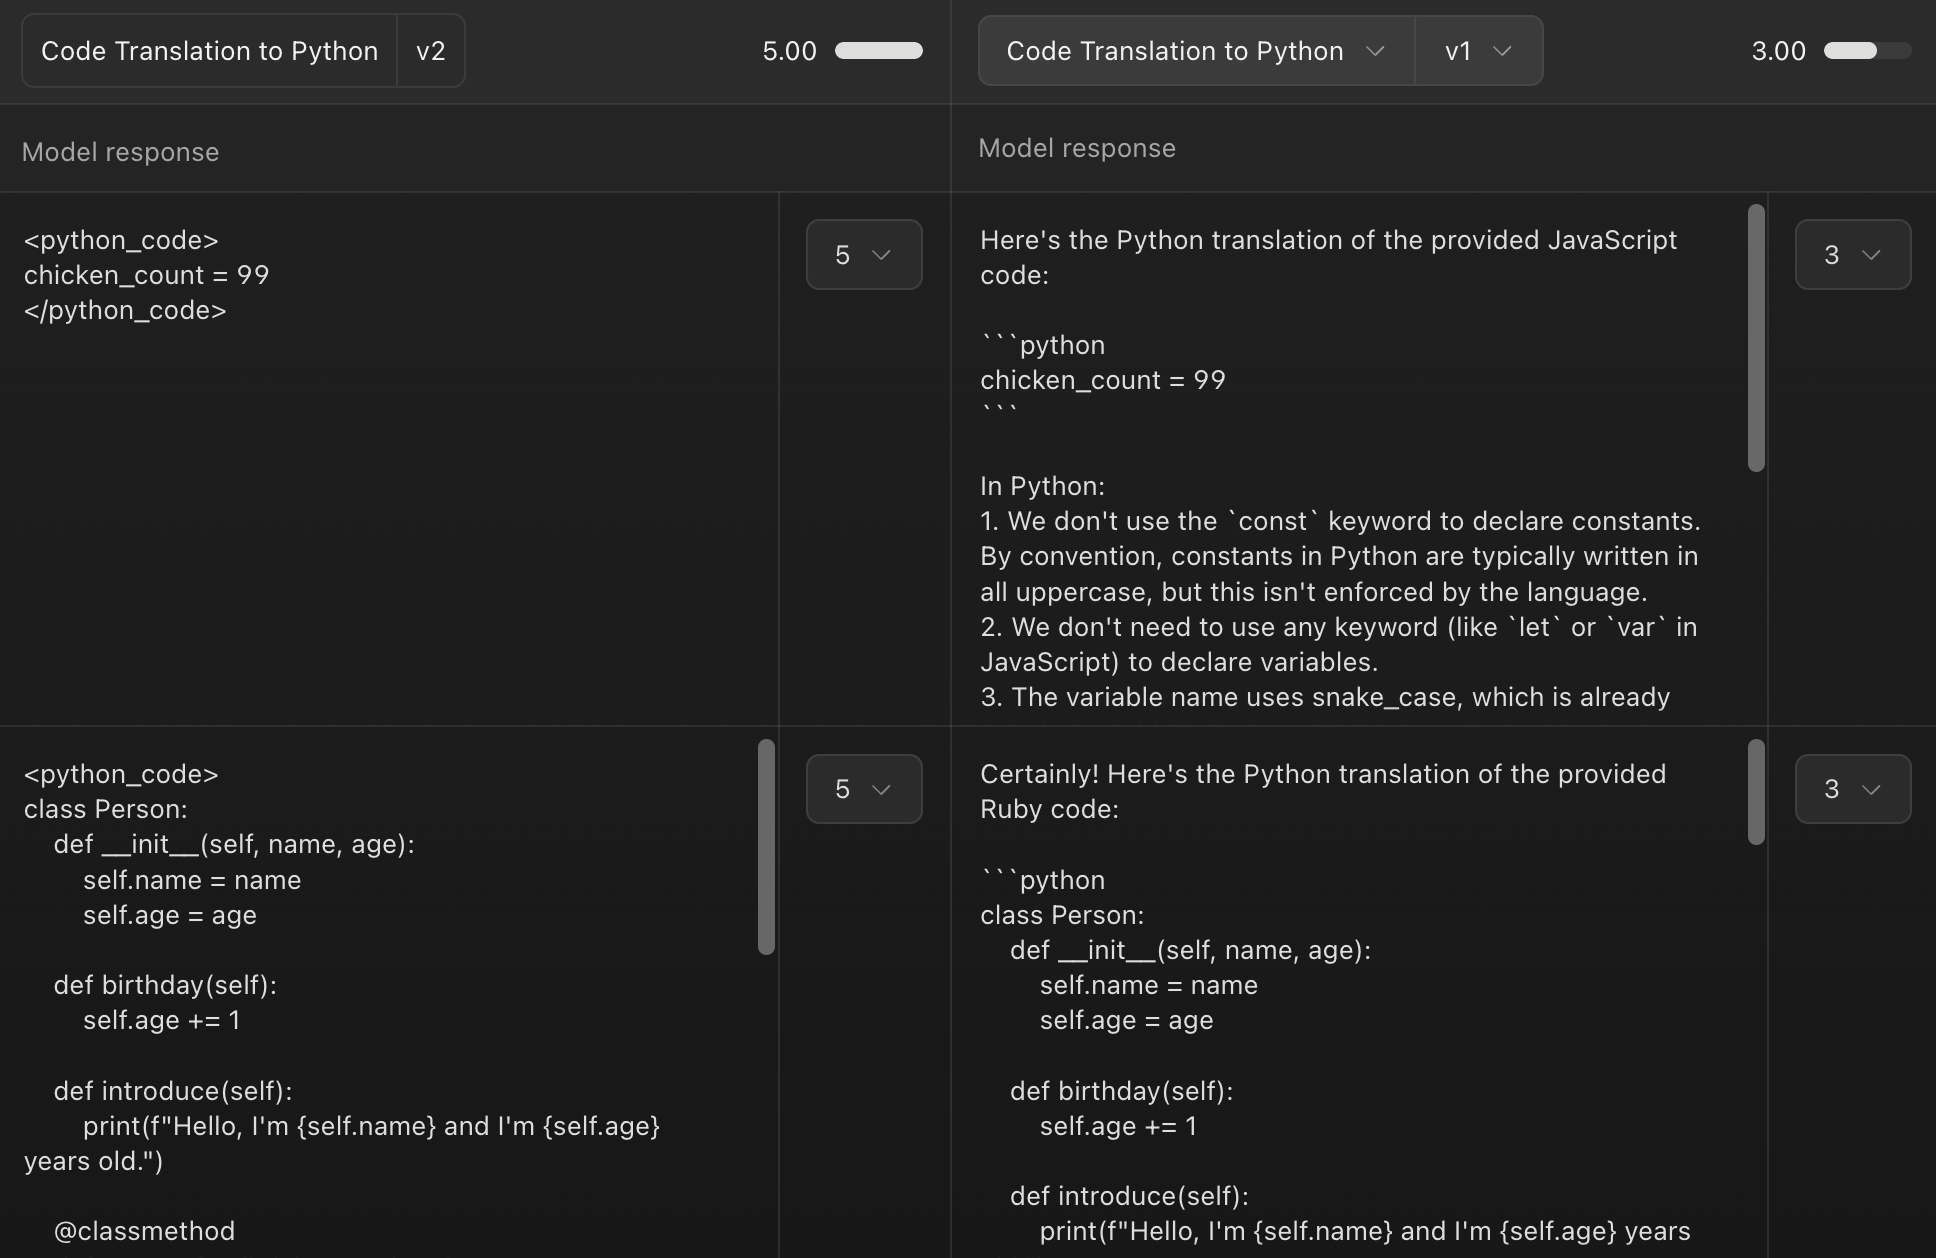

Clearly, we can see that our v2 prompt works much better for our specific use-case!

The Workbench and its evaluation tool are a great place to prototype prompts quickly and compare results side-by-side.  It's an ideal environment to start your evaluation journey, before moving to a more robust solution.  In upcoming lessons, we'll see how to automate larger-scale code-graded and model-graded lessons.